# PyCity Schools Analysis

## Overview 
Utilizing datasets containing math and reading scores for all students in the the PyCitySchools district, as well as various information on the schools they attend, data was aggregated to showcase obvious trends in school performance.
    
This analysis includes:
- District Summary
- School Summary
- Highest-Performing Schools by Percentage of Overall Passing
- Lowest-Performing Schools by Percentage of Overall Passing
- Math Scores by Grade
- Reading Scores by Grade
- Scores by School Spending
- Scores by School Size
- Scores by School Type
- Summary/Conclusions
- Supporting Details


## District Summary
Totals and averages for the PyCitySchools District are as follows:
- Total Schools: 15
- Total Students: 39,170
- Total Budget: $24,649,428.00
- Average Math Score: 78.985371
- Average Reading Score: 81.87784
- % Passing Math 74.980853
- % Passing Reading 85.805463
- % Overall Passing 65.172326


## School Summary
To support the analysis, the following data was aggregated for each school in the district. See the "School Summary" section in Supporting Details for more information.
- School type
- Total number of students
- Total budget
- Total spending per student
- Average math score
- Average reading score
- % of students passing math
- % of students passing reading
- % of students passing overall


## Highest-Performing Schools by Percentage of Overall Passing
Based on Overall Passing Rates, the following schools were found to be the highest performers:
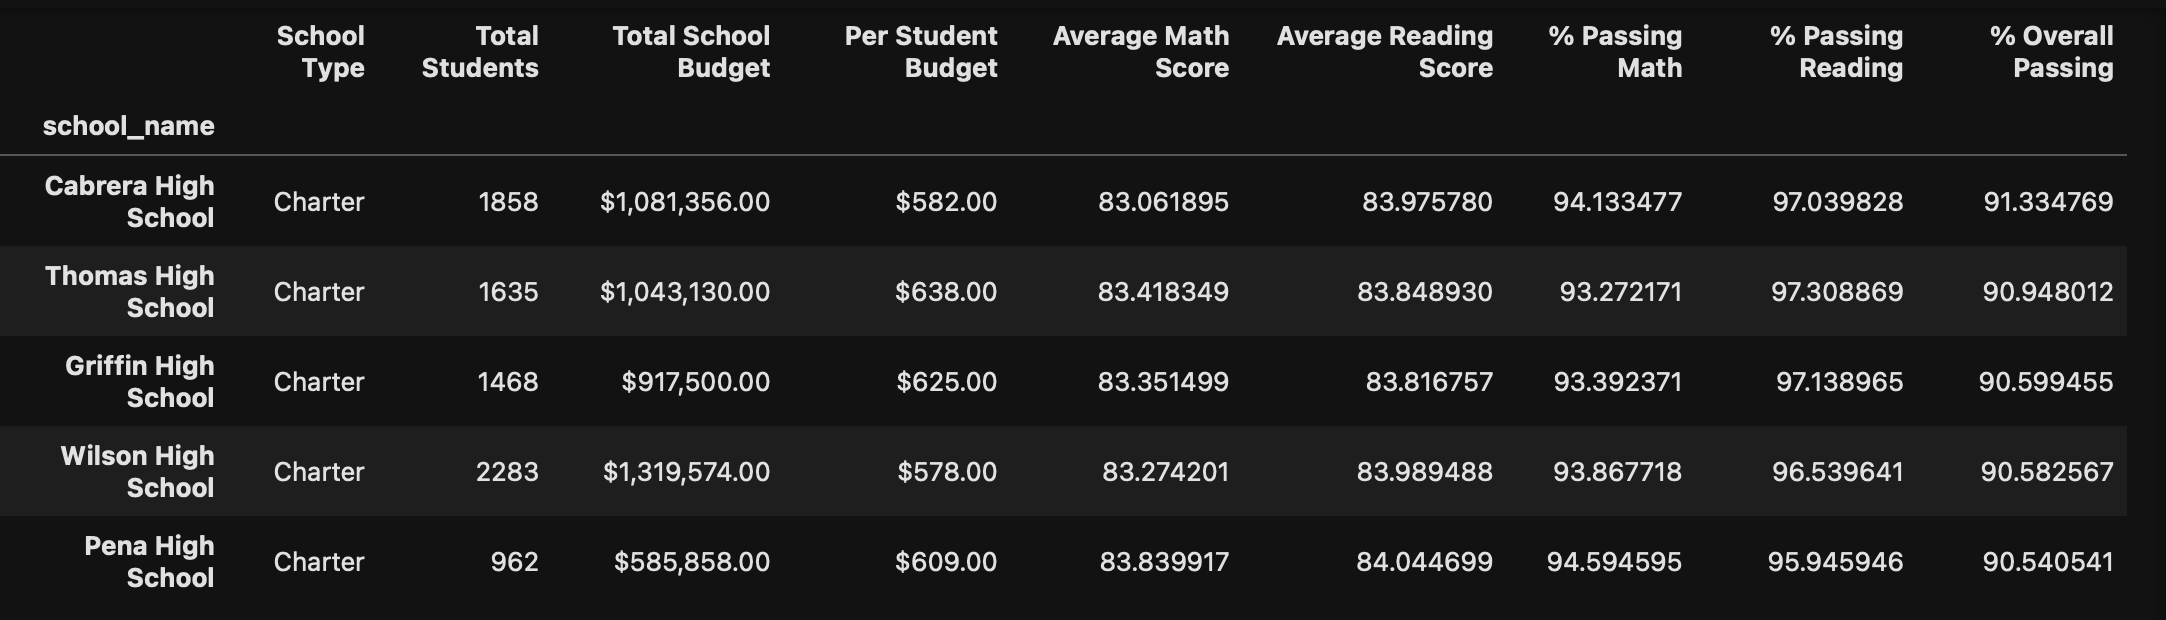

Observation: Passing rates for the highest-performing schools are about 25% higher than the district average.


## Bottom Performing Schools by Percentage of Overall Passing
Based on Overall Passing Rates, the following schools were found to be the lowest performers: 
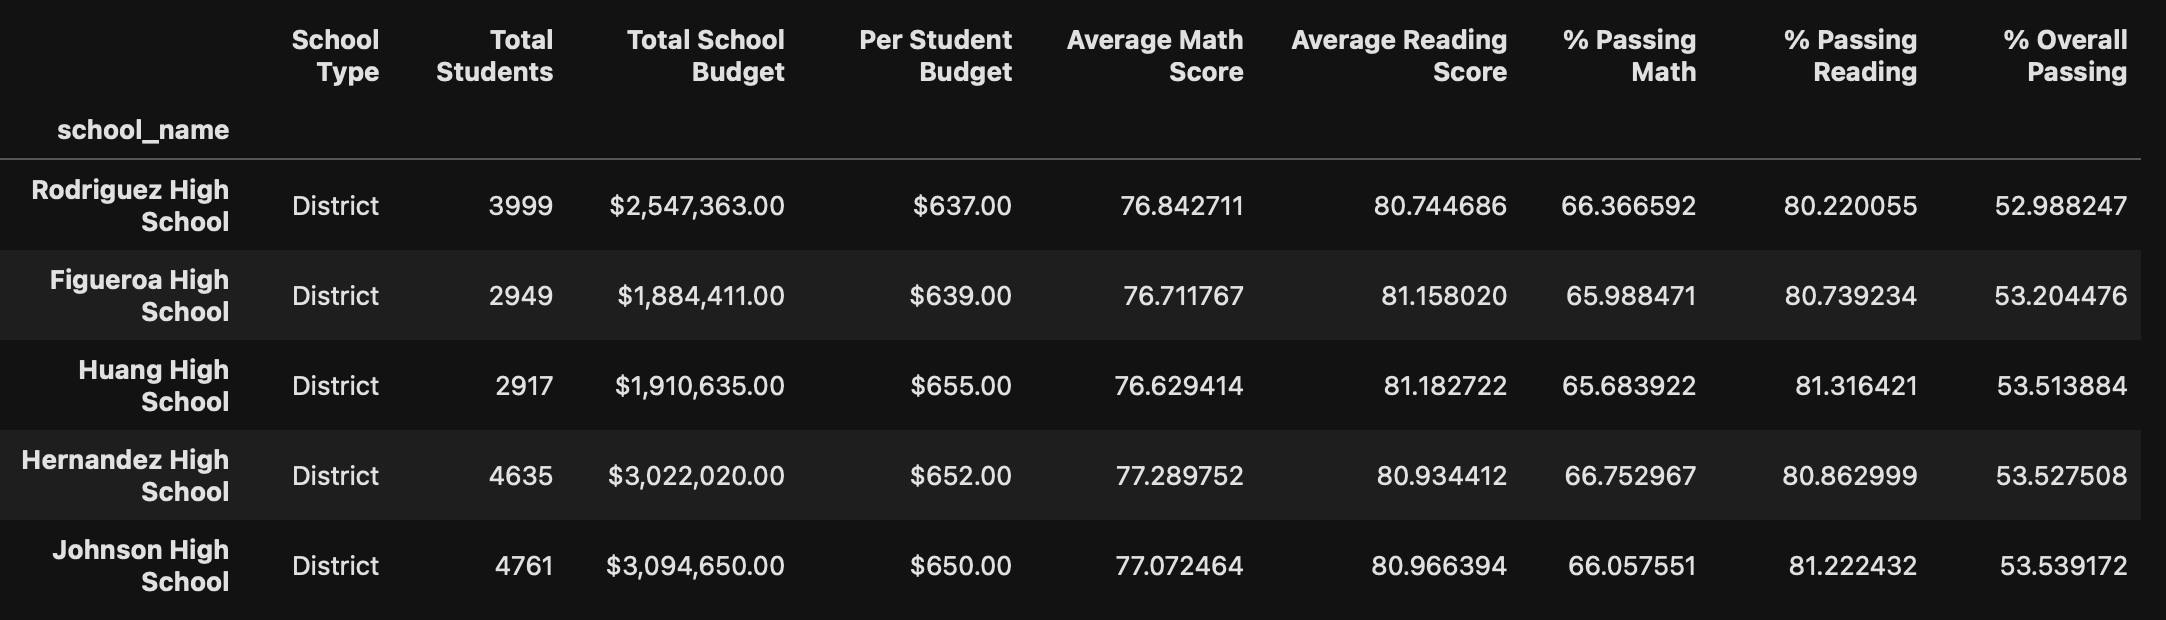

Observation: Passing rates for the lowest-performing schools are about 12% lower than the district average.


## Math Scores by Grade
Average math scores by grade were calculated for each school. See the "Math Scores" section in Supporting Details for more information.

Observation: Math scores at each school are generally consistent across grades.


## Reading Scores by Grade
Average reading scores by grade were calculated for each school. See the "Reading Scores" section in Supporting Details for more information.

Observation: Reading scores at each school are generally consistent across grades.


## Scores by School Spending
Average scores and passing rates were aggregated across the district by spending category:
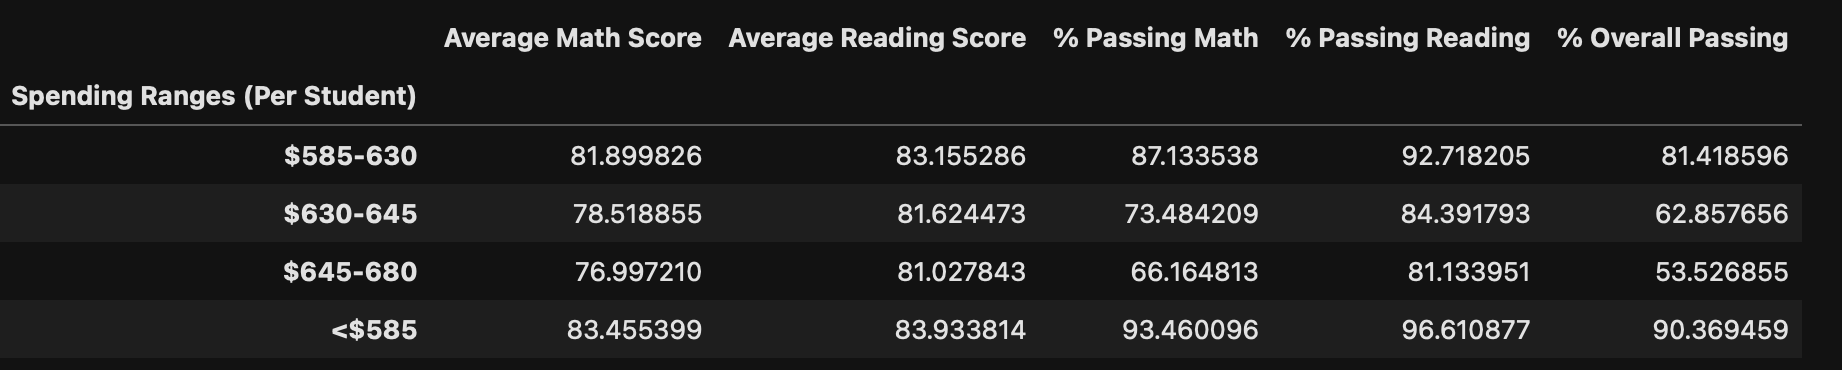

Observation: The data shows an inverse relationship between scores/passing rates and spending per student; as spending per student increases, scores and passing rates decrease.


## Scores by School Size
Average scores and passing rates were aggregated across the district by school size:
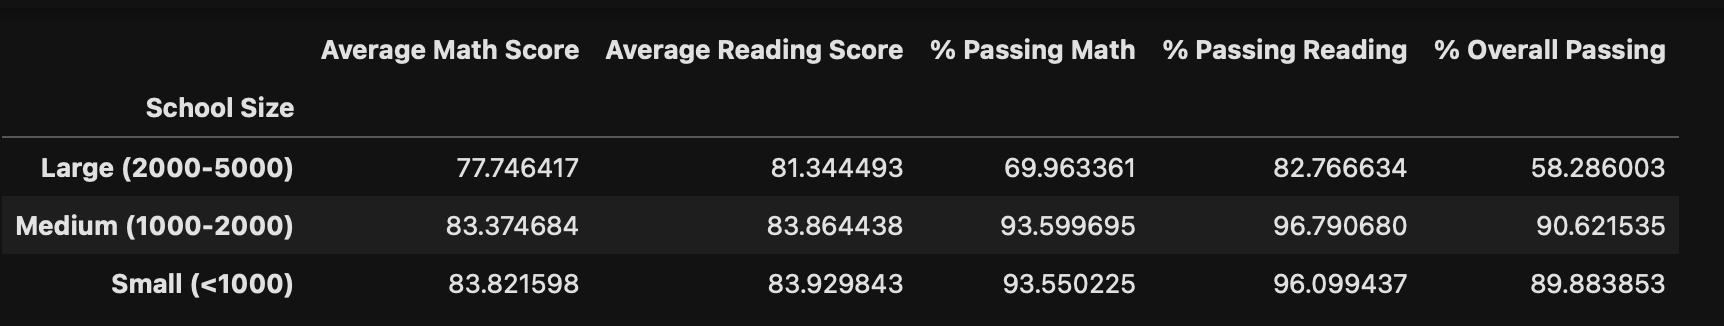

Observation: The data shows an inverse relationship between scores/passing rates and school size; as school size increases, scores and passing rates decrease.


## Scores by School Type
Average scores and passing rates were aggregated across the district by school type:
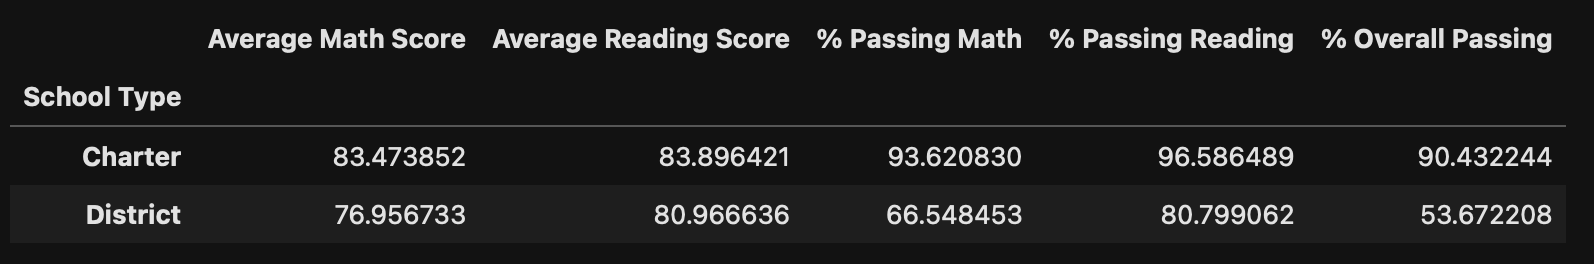

Observation: Charter schools have significantly higher success rates, especially in Math.

## Summary
Based on the above analysis and calculations, the following observations can be made: 
1. The data shows inverse relationships between: 
    - Scores and passing rates vs. spending per student; as spending per student increases, scores and passing rates decrease.
    - Scores and passing rates vs. school size; as school size increases, scores and passing rates decrease.
2. Charter schools have significantly higher success rates across all metrics. They also have lower spending per student and have fewer total students. 
3. Specific focus should be given to the District Math program due to the low passing rates.

## Expand the sections below to access the supporting details.
---

# Supporting Details

In [37]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.
school_data_complete = pd.merge(student_data, school_data, how="left", on="school_name", sort=True)
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,17871,Blake Martin,M,9th,Bailey High School,75,59,7,District,4976,3124928
1,17872,Kathryn Kane,F,12th,Bailey High School,84,58,7,District,4976,3124928
2,17873,Richard Haas,M,11th,Bailey High School,79,86,7,District,4976,3124928
3,17874,Frank Marsh,M,9th,Bailey High School,71,89,7,District,4976,3124928
4,17875,Charles Goodman Jr.,M,9th,Bailey High School,90,61,7,District,4976,3124928


## District Summary¶

In [2]:
# Calculate the total number of unique schools
school_count = len(school_data_complete["school_name"].unique())

# Display the total number of schools in the district
school_count

15

In [3]:
# Calculate the total number of students
student_count = len(school_data_complete["Student ID"].unique())

# Display the total number of students in the district
student_count

39170

In [4]:
# Calculate the total budget
total_budget = school_data["budget"].sum()

# Display the total district budget
total_budget


24649428

In [5]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()

# Display the average math score for the district
average_math_score

78.98537145774827

In [6]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()

# Display the average reading score for the district
average_reading_score

81.87784018381414

In [7]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100

# Display the percentage of district students passing math
passing_math_percentage

74.9808526933878

In [8]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100

# Display the percentage of district students passing reading
passing_reading_percentage

85.80546336482001

In [9]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
                            (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
                            ].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100

# Display the overall passing rate for district students
overall_passing_rate

65.17232575950983

In [10]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame({"Total Schools":[school_count],"Total Students":[student_count],"Total Budget":[total_budget],
                                 "Average Math Score":[average_math_score],"Average Reading Score":[average_reading_score],
                                 "% Passing Math":[passing_math_percentage],"% Passing Reading":[passing_reading_percentage],
                                 "% Overall Passing":[overall_passing_rate]})

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the district summary
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [11]:
# Use the code provided to select the type per school from school_data
school_types = school_data.set_index(["school_name"])["type"]
school_types_df=school_types.to_frame()

# Display the type (District or Charter) for each school in the district
school_types_df

,type
school_name,
Huang High School,District
Figueroa High School,District
Shelton High School,Charter
Hernandez High School,District
Griffin High School,Charter
Wilson High School,Charter
Cabrera High School,Charter
Bailey High School,District
Holden High School,Charter


In [12]:
# Calculate the total student count per school from school_data
per_school_counts = school_data.set_index(["school_name"])["size"]
per_school_counts_df = per_school_counts.to_frame()

# Display the number of students attending each school in the district
per_school_counts_df

,size
school_name,
Huang High School,2917
Figueroa High School,2949
Shelton High School,1761
Hernandez High School,4635
Griffin High School,1468
Wilson High School,2283
Cabrera High School,1858
Bailey High School,4976
Holden High School,427


In [13]:
# Calculate the total school budget and per capita spending per school from school_data
per_school_budget = school_data.set_index(["school_name"])[["type","size","budget"]]
per_school_capita = per_school_budget["budget"]/per_school_budget["size"]

# Add the per student budget amount per school to a table along with type, size and budget
per_school_budget["Per Student Budget"] = per_school_capita

# For each school in the district, display the type, size, budget and spending per student
per_school_budget.sort_values("school_name")

,type,size,budget,Per Student Budget
school_name,,,,
Bailey High School,District,4976,3124928,628.0
Cabrera High School,Charter,1858,1081356,582.0
Figueroa High School,District,2949,1884411,639.0
Ford High School,District,2739,1763916,644.0
Griffin High School,Charter,1468,917500,625.0
Hernandez High School,District,4635,3022020,652.0
Holden High School,Charter,427,248087,581.0
Huang High School,District,2917,1910635,655.0
Johnson High School,District,4761,3094650,650.0


In [14]:
# Calculate the average test scores per school from school_data_complete
per_school_math = school_data_complete.groupby(["school_name"]).mean("math_score")
per_school_reading = school_data_complete.groupby(["school_name"]).mean("reading_score")

# Put the average math and reading scores into a table by school
per_school_avg_scores = per_school_math.loc[:,("math_score","reading_score")]

# Display the average math and reading scores by school
per_school_avg_scores

,math_score,reading_score
school_name,,
Bailey High School,77.048432,81.033963
Cabrera High School,83.061895,83.975780
Figueroa High School,76.711767,81.158020
Ford High School,77.102592,80.746258
Griffin High School,83.351499,83.816757
Hernandez High School,77.289752,80.934412
Holden High School,83.803279,83.814988
Huang High School,76.629414,81.182722
Johnson High School,77.072464,80.966394


In [15]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_passing_math = school_data_complete[(school_data_complete["math_score"] >= 70)]
school_students_passing_math = students_passing_math.groupby(["school_name"]).size()

# Display the number of students passing Math at each school in the district
school_students_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
dtype: int64

In [16]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
students_passing_reading = school_data_complete[(school_data_complete["reading_score"] >= 70)]
school_students_passing_reading = students_passing_reading.groupby(["school_name"]).size()

# Display the number of students passing reading at each school in the district
school_students_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
dtype: int64

In [17]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()

# Display the number of students at each school who passed both math and reading
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [18]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100


In [19]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.merge(per_school_budget,per_school_avg_scores,on="school_name")
per_school_summary["% Passing Math"] = per_school_passing_math
per_school_summary["% Passing Reading"] = per_school_passing_reading
per_school_summary["% Overall Passing"] = overall_passing_rate

# Display the raw summary data by school
per_school_summary.sort_values("school_name")

,type,size,budget,Per Student Budget,math_score,reading_score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,53.539172


In [20]:
# Rename the column headers to be more meaningful
per_school_summary = per_school_summary.sort_values("school_name")
per_school_summary = per_school_summary.rename(columns={"type":"School Type",
                                                        "size":"Total Students",
                                                        "budget":"Total School Budget",
                                                        "reading_score":"Average Reading Score", 
                                                        "math_score":"Average Math Score"
                                                        })
# Format the financial data
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the final summary data by school
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Highest-Performing Schools (by % Overall Passing)

In [21]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values("% Overall Passing", ascending=False)

# Display summary information for the five top performing schools in the district
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [22]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values("% Overall Passing")

# Display the summary information for the five bottom performing schools in the district
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [23]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean("math_score")
tenth_grader_math_scores = tenth_graders.groupby(["school_name"]).mean("math_score")
eleventh_grader_math_scores = eleventh_graders.groupby(["school_name"]).mean("math_score")
twelfth_grader_math_scores = twelfth_graders.groupby(["school_name"]).mean("math_score")

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"9th":ninth_grade_math_scores["math_score"],
                                     "10th":tenth_grader_math_scores["math_score"],
                                     "11th":eleventh_grader_math_scores["math_score"],
                                     "12th":twelfth_grader_math_scores["math_score"]})
# Minor data wrangling - remove the index header
math_scores_by_grade.index.name = None

# Display the average math scores by school and grade
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [24]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean("reading_score")
tenth_grader_reading_scores = tenth_graders.groupby(["school_name"]).mean("reading_score")
eleventh_grader_reading_scores = eleventh_graders.groupby(["school_name"]).mean("reading_score")
twelfth_grader_reading_scores = twelfth_graders.groupby(["school_name"]).mean("reading_score")

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({"9th":ninth_grade_reading_scores["reading_score"],
                                        "10th":tenth_grader_reading_scores["reading_score"],
                                        "11th":eleventh_grader_reading_scores["reading_score"],
                                        "12th":twelfth_grader_reading_scores["reading_score"]})

# Minor data wrangling - remove the index header
reading_scores_by_grade.index.name = None

# Display the average reading scores by school and grade
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [25]:
# Establish the bins for the spending ranges
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [26]:
# Create a copy of the school summary for later aggregations
school_spending_df = per_school_summary.copy()

In [27]:
# Use `pd.cut` on the per_school_capita Series from earlier to categorize per student spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(per_school_budget["Per Student Budget"], bins=spending_bins, labels=labels) 

# Convert Spending Ranges (Per Student) to a string
school_spending_df["Spending Ranges (Per Student)"] = school_spending_df["Spending Ranges (Per Student)"].astype(str)

# Display the summary data for each school, categorized by spending range
school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


In [28]:
#  Calculate averages for the desired columns.
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()

In [29]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({"Average Math Score":spending_math_scores,
                                 "Average Reading Score":spending_reading_scores,
                                 "% Passing Math":spending_passing_math,
                                 "% Passing Reading":spending_passing_reading,
                                 "% Overall Passing":overall_passing_spending})

# Display average scores and passing rates across the district by spending range
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855
<$585,83.455399,83.933814,93.460096,96.610877,90.369459


## Scores by School Size

In [30]:
# Establish the school size bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [31]:
# Create a copy of the school summary for later aggregations
school_size_df = per_school_summary.copy()

In [32]:
# Use `pd.cut` on the per_school_counts Series from earlier to categorize school size based on the bins.
school_size_df["School Size"] = pd.cut(per_school_budget["size"], bins=size_bins, labels=labels) 

# Convert School Size to a string
school_size_df["School Size"] = school_size_df["School Size"].astype(str)

# Display the summary data for each school, categorized by school size
school_size_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)


In [33]:
# Calculate averages for the desired columns.
size_math_scores = school_size_df.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = school_size_df.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = school_size_df.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = school_size_df.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = school_size_df.groupby(["School Size"])["% Overall Passing"].mean()

In [34]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({"Average Math Score":size_math_scores,
                             "Average Reading Score":size_reading_scores,
                             "% Passing Math":size_passing_math,
                             "% Passing Reading":size_passing_reading,
                             "% Overall Passing":size_overall_passing})


# Display average scores and passing rates across the district by school size
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853


## Scores by School Type

In [35]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()

In [36]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({"Average Math Score":average_math_score_by_type,
                             "Average Reading Score":average_reading_score_by_type,
                             "% Passing Math":average_percent_passing_math_by_type,
                             "% Passing Reading":average_percent_passing_reading_by_type,
                             "% Overall Passing":average_percent_overall_passing_by_type})

# Display average scores and passing rates across the district by school type
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
